## Multiple Linear Regression (MLR)

In this challenge, you need to model the relationship between variables and report the model accuracy. To solve the problem, you may:

1. Add and/or remove any imports you.
2. Any method(s) you see fit.
3. Use any resources, including internet resources.

We are interested in understanding how you approach problems, so remember to explain why you are using specific approaches, methods, functions, etc.

## Problem overview
You are provided the mtcars (Motor trend car road tests) dataset, which comprises fuel consumption and ten other characteristics of autombile design and performance. The dataset includes the following variables:

| Name | Description |
|------|------------------------------------------|
| mpg  | Miles/(US) gallon                        |
| cyl  | Number of cylinders                      |
| disp | Displacement (cu.in.)                    |
| hp   | Gross horsepower                         |
| drat | Rear axle ratio                          |
| wt   | Weight (1000 lbs)                        |
| qsec | 1/4 mile time                            |
| vs   | Engine (0 = V-shaped, 1 = straight)      |
| am   | Transmission (0 = automatic, 1 = manual) |
| gear | Number of forward gears                  |


You need to **model the relationship between $mpg$ and other related feature(s)** in this dataset to determine how car design influences miles per (US) gallon.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

## Load the data

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
mtcars = df
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Exploratary Data Analysis

In [3]:
# use info() to display summary information about the DataFrame
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In the output, you can see that the DataFrame has 32 rows and 11 columns. Each column is listed along with the number of non-null values and the data type.

### Dataset Numerical columns statistics

In [4]:
# use describe() to get the summary statistics of the numerical columns
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Here is an explanation of the output:
<ul>
<li>count: number of non-null values in each column</li>
<li>mean: average value of each column</li>
<li>std: standard deviation of each column</li>
<li>min: minimum value of each column</li>
<li>25%: 25th percentile value of each column (i.e. value below which 25% of the data falls)</li>
<li>50%: 50th percentile value of each column, also known as the median</li>
<li>75%: 75th percentile value of each column (i.e. value below which 75% of the data falls)</li>
<li>max: maximum value of each column</li>
</ul> 
In general, a high standard deviation indicates that the data points are spread out over a wider range of values, while a low standard deviation indicates that the data points are clustered around the mean.

In [5]:
# use .shape to verify the number of rows and columns
mtcars.shape

(32, 11)

This is to confirm that the DataFrame has 32 rows and 11 columns. 

To model the relationship between variables, we consider the following plots:
<ul>
   <li>Bar plot: This is a graphical representation of categorical data using rectangular bars. Each bar represents a category and the height of the bar corresponds to the value of that category.</li>
<li>Scatter plot matrix: This plot can show the pairwise scatterplots between all the variables in the dataset. It can help in identifying any linear or nonlinear relationships between the variables.</li>
<li>Histogram: A histogram can be created for each variable to understand the distribution of the variable. </li>
<li>Box plot: A box plot can be created for each variable to understand the distribution of the variable and identify any outliers. </li>
<li>Correlation plot: A correlation plot can be used to identify the strength and direction of the relationship between variables. </li>
</ul> 

### Bar plot

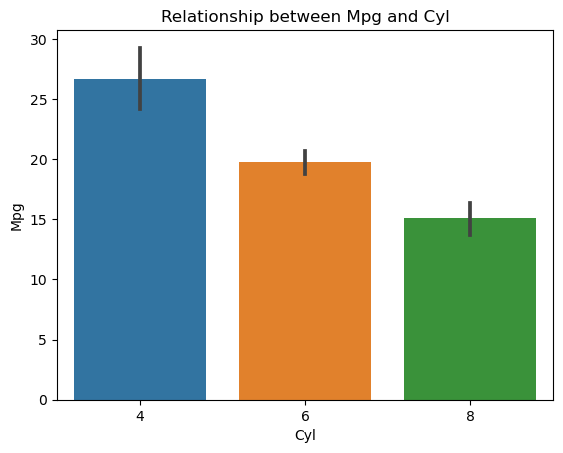

In [6]:
# create a bar plot
sns.barplot(x="cyl", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Cyl")
plt.xlabel('Cyl')
plt.ylabel('Mpg')
# Show the plot
plt.show()

Based on the figure above, it is evident that there is an inverse relationship between the number of cylinders of the various models and the mpg (fuel consumption). As the number of cylinders increases, the mpg decreases.

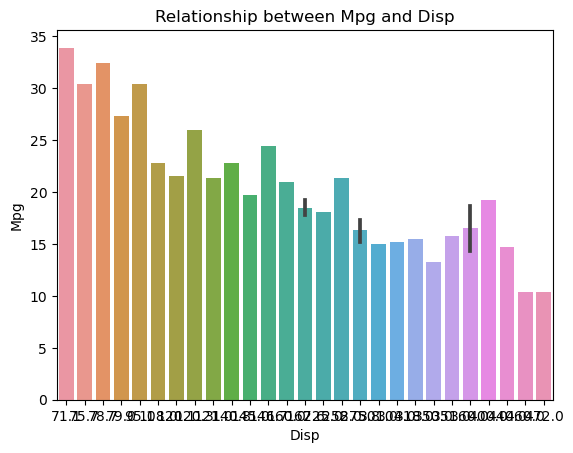

In [7]:
# create a bar plot
sns.barplot(x="disp", y="mpg", data=mtcars)
plt.title("Relationship between Mpg and Disp")
plt.xlabel('Disp')
plt.ylabel('Mpg')
# Show the plot
plt.show()

From the presented figure, it is apparent that as the displacement (the volume of air that is moved by the engine's pistons) of the various models increases, the mpg (fuel consumption) decreases. However, there may be some displacement values that do not conform to this pattern. Overall, the majority of the values support this statement.

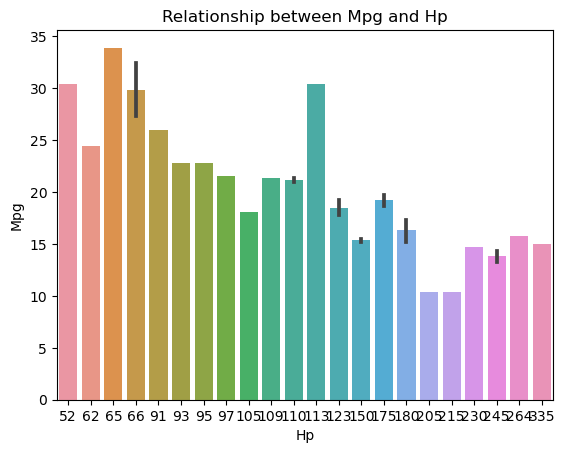

In [8]:
# create a bar plot
sns.barplot(x="hp", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Hp")
plt.xlabel('Hp')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure above reveals that there is an inverse relationship between the Gross Horsepower (an engine output measurement taken without the engine installed in a vehicle) of the various models and the mpg (fuel consumption). Although there may be some Gross Horsepower values that deviate from this trend, the majority of the values align with this pattern. 

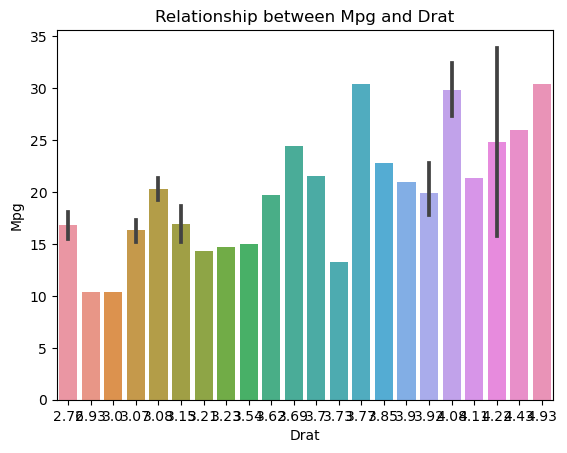

In [9]:
# create a bar plot
sns.barplot(x="drat", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Drat")
plt.xlabel('Drat')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows that there is a positive relationship between Rear axle ratio and mpg. However, it is important to note that there may be some values of Rear axle ratio that do not follow this trend. The majority of the data points seem to support this observation.

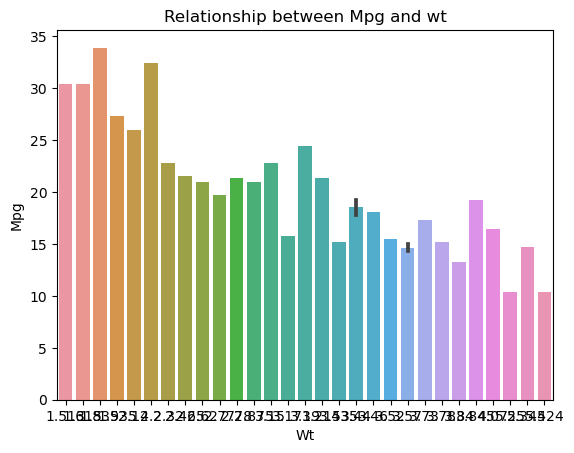

In [52]:
# create a bar plot
sns.barplot(x="wt", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and wt")
plt.xlabel('Wt')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows that there is a negative relationship between weight and mpg. However, it is important to note that there may be some values of weight (wt) that do not follow this trend. The majority of the data points seem to support this observation.

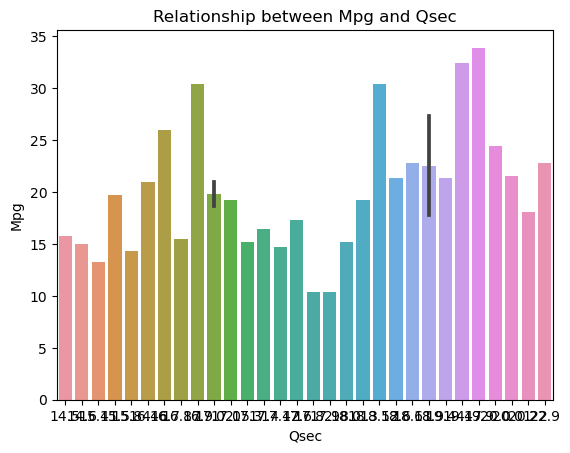

In [10]:
# create a bar plot
sns.barplot(x="qsec", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Qsec")
plt.xlabel('Qsec')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure displayed above depicts a complex pattern, as it does not clearly indicate whether there is a significant increase or decrease in mpg as qsec (the time taken to cover a quarter-mile from a standing start) increases across the different models. It could be referred to as a weak positive correlation.

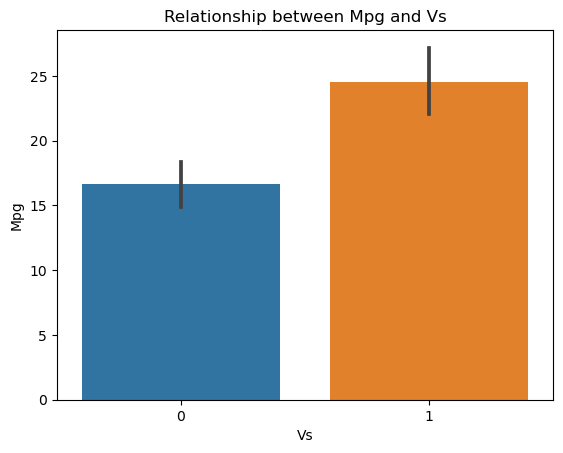

In [11]:
# create a bar plot
sns.barplot(x="vs", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Vs")
plt.xlabel('Vs')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure depicts a positive relationship between vs and mpg, indicating that as vs increases, mpg also increases. Therefore, V-shaped Engines appear to have better fuel efficiency than straight engines.

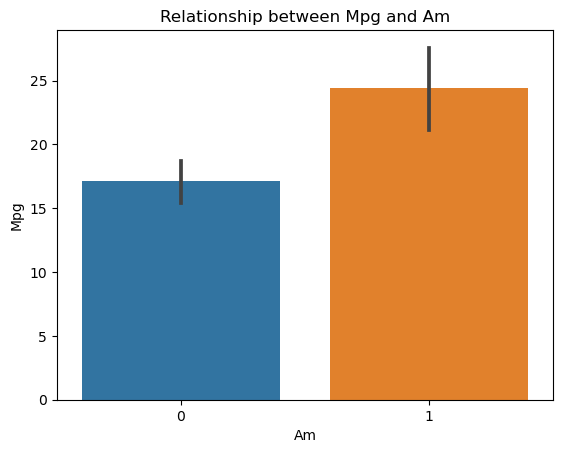

In [12]:
# create a bar plot
sns.barplot(x="am", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Am")
plt.xlabel('Am')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure illustrates a positive correlation between am and mpg, suggesting that an increase in am is associated with an increase in mpg. Thus, it can be concluded that automatic transmission may have a better fuel efficiency compared to manual transmission.

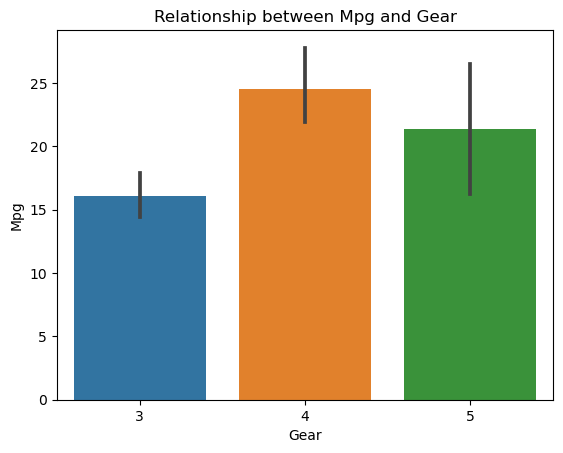

In [13]:
# create a bar plot
sns.barplot(x="gear", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Gear")
plt.xlabel('Gear')
plt.ylabel('Mpg')
# Show the plot
plt.show()

According to the figure, there is a relationship between fuel consumption (mpg) and the different forward gear positions. Specifically, fuel consumption tends to be highest in gear 4 followed by gear 5, while gear 3 has the lowest consumption. 

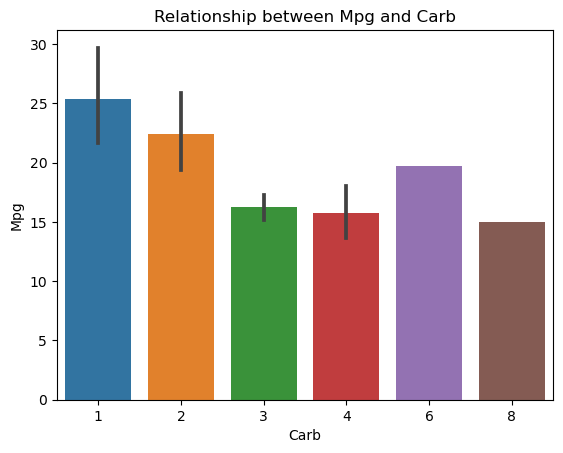

In [14]:
# create a bar plot
sns.barplot(x="carb", y="mpg", data=mtcars)
# Set the title and axis labels
plt.title("Relationship between Mpg and Carb")
plt.xlabel('Carb')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure suggests a negative correlation between carburetor (carb) and mpg. However, there is an a slight deviation at the value of 6. These values may be the representation of the type of carb within the car models in the dataset.

### Histogram

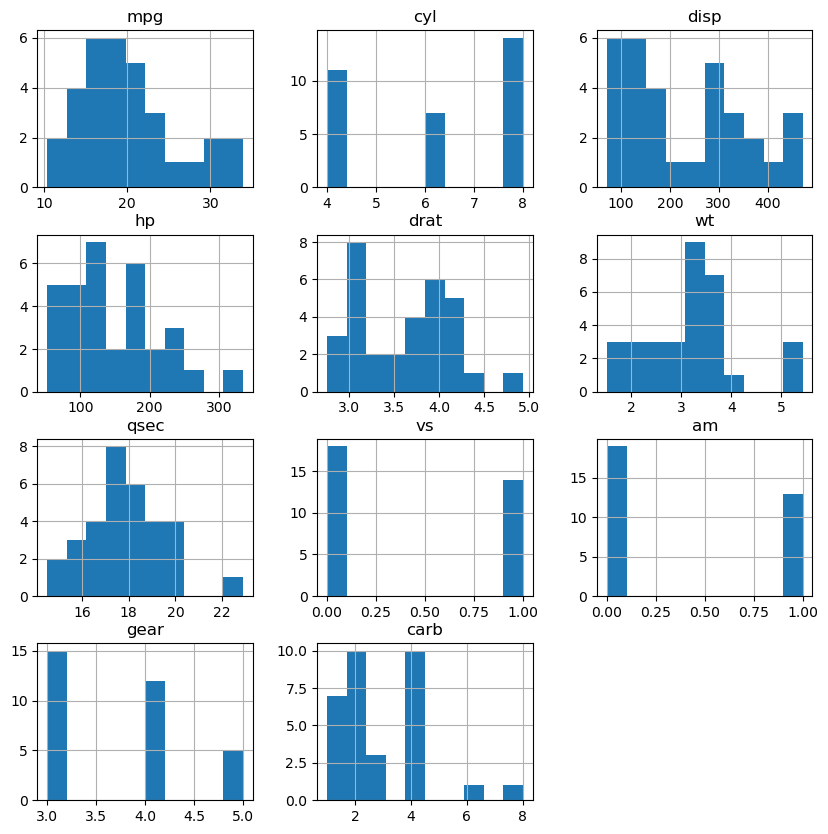

In [15]:
# Create histogram
mtcars.hist(figsize=(10,10))
plt.show()

### Box Plot

To interpret the histogram, we can observe the x-axis, which represents the values in the dataset, and the y-axis, which represents the frequency of observations in each bin. For instance, in the "Mpg" histogram, we can see that the highest frequency of fuel consumption falls within the bin(s) between approximately 15-20, with lower fuel consumption observed in the approximately 24-29 bin(s). 

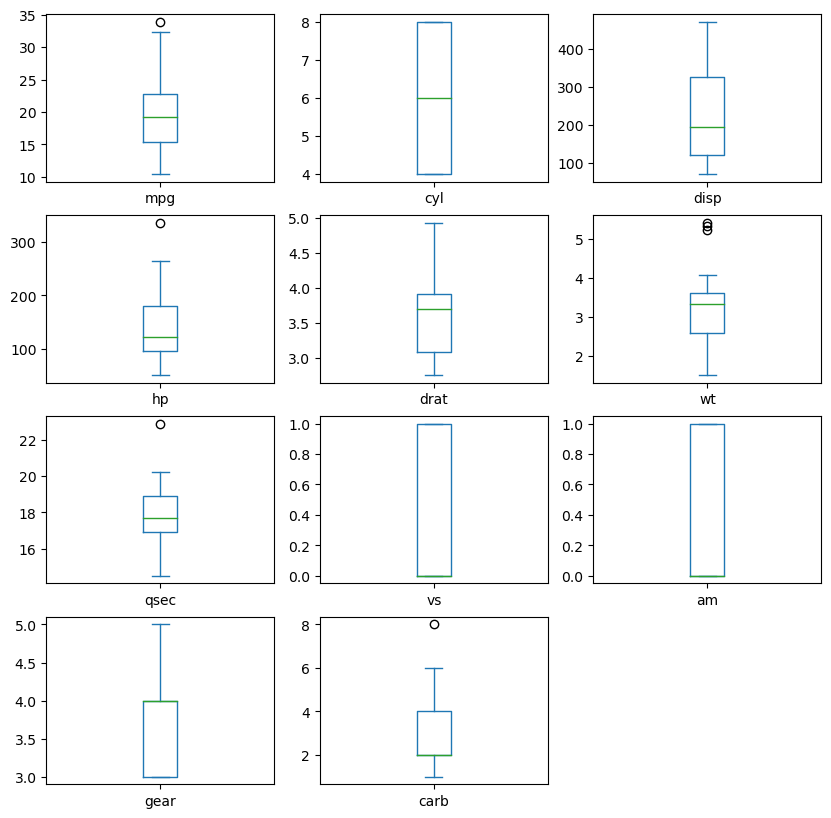

In [16]:
# Box plot
mtcars.plot(kind='box', subplots=True, layout=(4,3), figsize=(10,10))
plt.show()

A boxplot is a graphical representation of a dataset that summarizes the distribution of the data. It is a standardized way of displaying the distribution of data based on five key values: minimum, first quartile, median, third quartile, and maximum.

In a boxplot, a box is drawn to represent the middle 50% of the data, with the bottom and top of the box representing the first and third quartiles, respectively. The median is represented by a line inside the box. Whiskers are then drawn extending from the box to represent the minimum and maximum values of the data that are not outliers. Outliers, which are values that fall outside the whiskers, are usually represented by individual points or dots.

An example in this case could be the "Mpg" column, which shows the fuel consumption values falling within the range of approximately 10.4 to 33.0. There appears to be an outlier at around 34 in the distribution.

### Scatter Plot

To interpret a scatter plot, you can look for the following patterns:
<ul>
<li>Positive correlation: When the dots on the scatter plot form a line that slopes upwards from left to right, it indicates a positive correlation between the two variables. This means that as one variable increases, so does the other variable.</li>

<li>Negative correlation: When the dots on the scatter plot form a line that slopes downwards from left to right, it indicates a negative correlation between the two variables. This means that as one variable increases, the other variable decreases.</li>

<li>No correlation: When the dots on the scatter plot appear randomly scattered with no discernible pattern, it indicates that there is no correlation between the two variables.</li>

<li>Non-linear correlation: When the dots on the scatter plot follow a curved pattern, it indicates a non-linear correlation between the two variables. This means that the relationship between the two variables is more complex and may require further analysis.</li>
</ul>

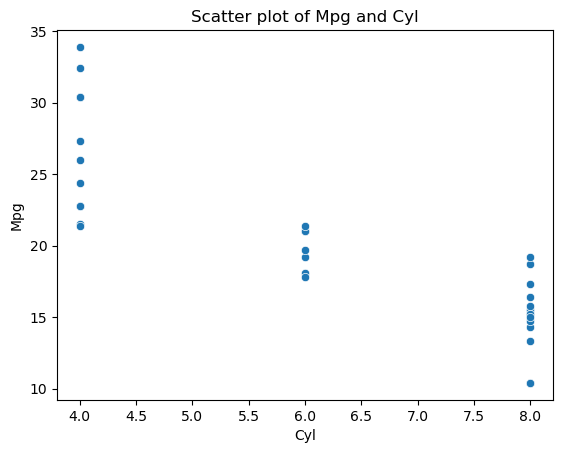

In [17]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="cyl", y="mpg")
plt.title("Scatter plot of Mpg and Cyl")
plt.xlabel('Cyl')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure indicates a clear inverse relationship, which could be interpreted as a negative correlation. 

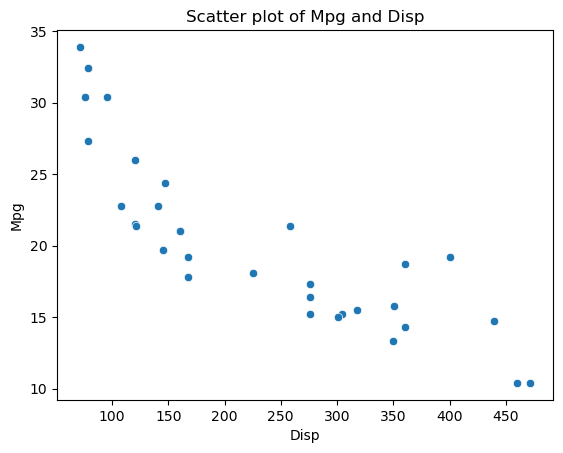

In [18]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="disp", y="mpg")
plt.title("Scatter plot of Mpg and Disp")
plt.xlabel('Disp')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure indicates a clear inverse relationship, which could be interpreted as a negative correlation.

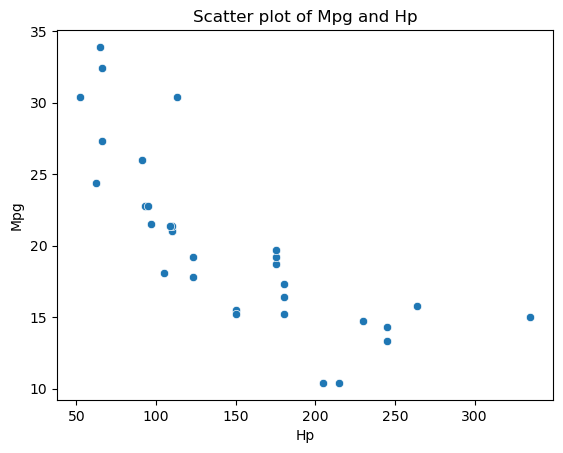

In [19]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="hp", y="mpg")
plt.title("Scatter plot of Mpg and Hp")
plt.xlabel('Hp')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure indicates an inverse relationship, which could be interpreted as a negative correlation.

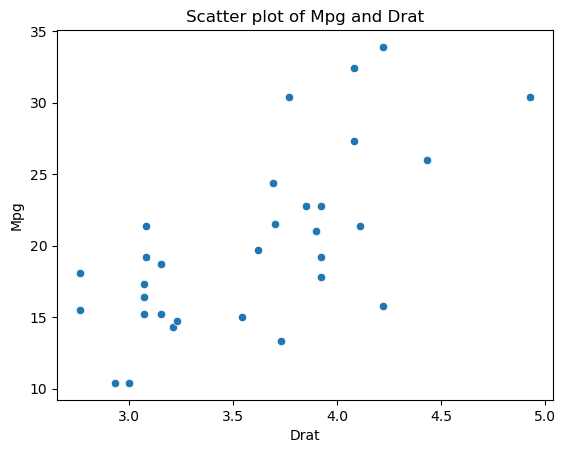

In [20]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="drat", y="mpg")
plt.title("Scatter plot of Mpg and Drat")
plt.xlabel('Drat')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure depicts a positive correlation.

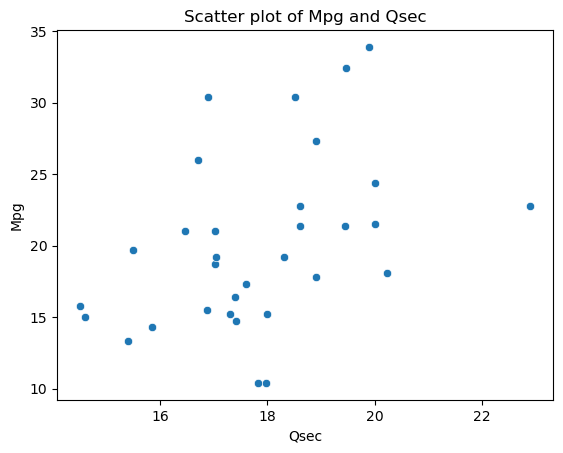

In [21]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="qsec", y="mpg")
plt.title("Scatter plot of Mpg and Qsec")
plt.xlabel('Qsec')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows a weak positive correlation, as the scatter plot does not seem to converge strongly in any direction.

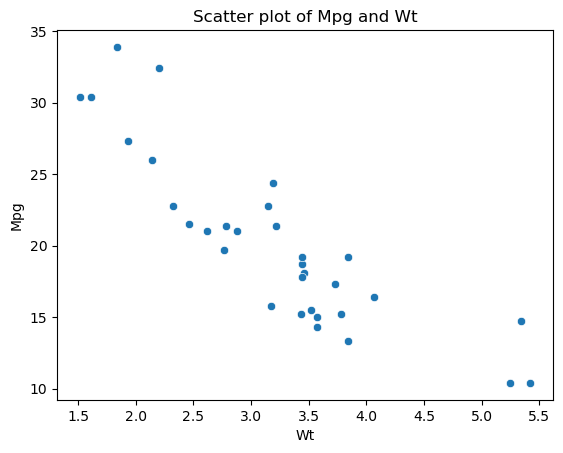

In [53]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="wt", y="mpg")
plt.title("Scatter plot of Mpg and Wt")
plt.xlabel('Wt')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows a positive correlation.

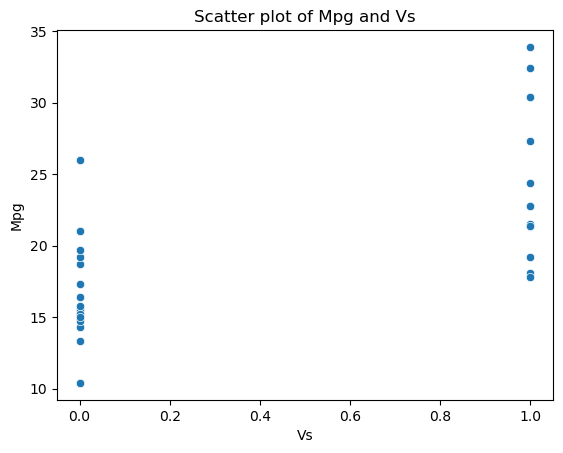

In [22]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="vs", y="mpg")
plt.title("Scatter plot of Mpg and Vs")
plt.xlabel('Vs')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure depicts a positive correlation.

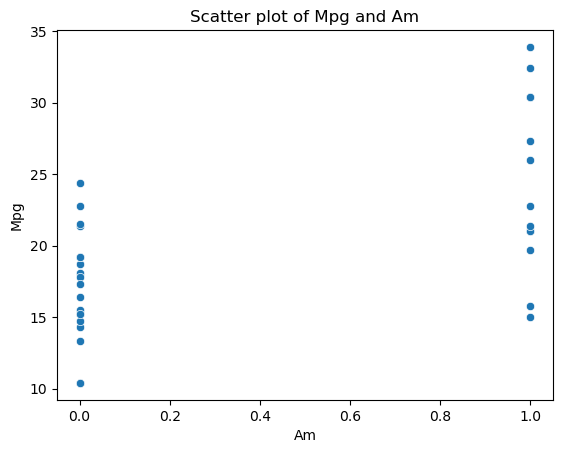

In [23]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="am", y="mpg")
plt.title("Scatter plot of Mpg and Am")
plt.xlabel('Am')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure depicts a positive correlation.

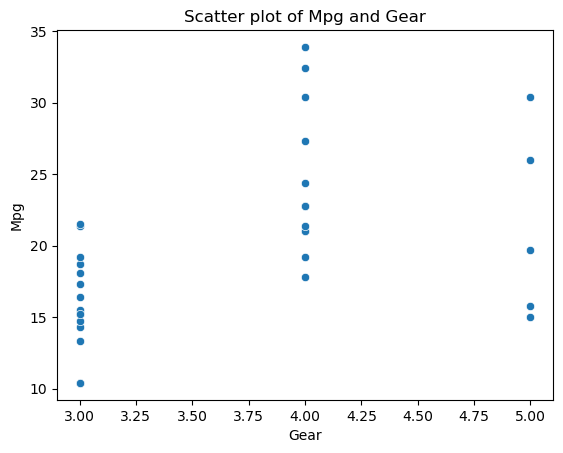

In [24]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="gear", y="mpg")
plt.title("Scatter plot of Mpg and Gear")
plt.xlabel('Gear')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows a weak positive correlation, as the scatter plot does not seem to converge strongly in any direction. 

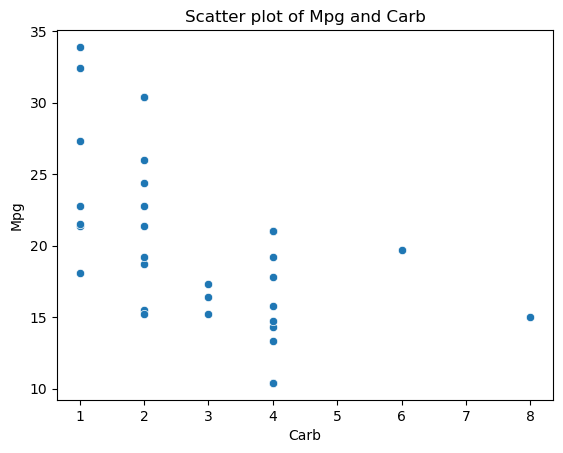

In [25]:
# Create a scatter plot
sns.scatterplot(data=mtcars, x="carb", y="mpg")
plt.title("Scatter plot of Mpg and Carb")
plt.xlabel('Carb')
plt.ylabel('Mpg')
# Show the plot
plt.show()

The figure shows negative correlation, which seems to be slightly weak.

### Correlation plot

When interpreting a correlation plot, we examine the correlation coefficients between pairs of variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

In a correlation plot, the variables are usually represented as rows and columns, with the correlation coefficients displayed in the cells. The plot may use colors or shades to indicate the strength of the correlation, such as darker shades for stronger correlations and lighter shades for weaker correlations.

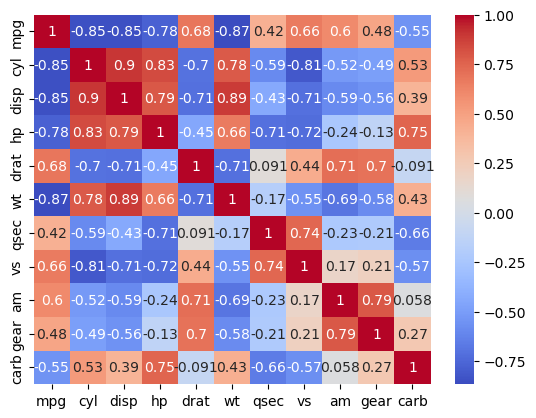

In [26]:
# Correlation plot
sns.heatmap(mtcars.corr(), annot=True, cmap='coolwarm')
plt.show()

From the correlation plot (heatmap), we can observe the strength and direction of the relationships between variables. For instance, focusing on the correlation between "mpg" and "cyl", we can see a strong correlation indicated by the dark purple colour. The correlation coefficient of -0.85 further confirms this strong negative correlation. This means that as the number of cylinders ("cyl") increases, the fuel consumption ("mpg") tends to decrease. 

## Designing the Model

When designing this model, two important aspects need to be taken into consideration to ensure a successful model design: <strong>feature scaling</strong> and <strong>feature selection</strong>. These considerations are particularly relevant when employing the multiple linear regression machine learning technique. By appropriately scaling the features and selecting the most relevant ones, we can enhance the model's performance and accuracy in predicting the target variable.

### Feature scaling
Feature scaling involves transforming the features to a common scale, ensuring that they are comparable and have a similar impact on the model. This step is important when the features have different units or scales, as it helps to prevent certain features from dominating the model based solely on their magnitude. By scaling the features, we can ensure a fair and meaningful comparison among them.

There are several methods available for feature scaling. Here are some commonly used methods:
<ul>
<li>Standardization (Z-score normalization): This method scales the features to have zero mean and unit variance. It subtracts the mean from each feature and divides it by the standard deviation. Standardization ensures that the features have similar scales and are centered around zero.</li>

<li>Min-Max Scaling: This method scales the features to a specific range, typically between 0 and 1. It subtracts the minimum value from each feature and divides it by the range (maximum value minus minimum value). Min-max scaling preserves the original distribution of the data.</li>

<li>Robust Scaling: This method is suitable for handling outliers in the data. It scales the features by subtracting the median and dividing by the interquartile range (IQR). Robust scaling is less sensitive to outliers compared to standardization or min-max scaling.</li>

<li>Normalization: This method scales the features to have a unit norm (length of 1). It divides each feature vector by its Euclidean norm. Normalization is useful when the magnitude of the feature vectors is not important, and only the direction or angle matters.</li>

<li>The choice of feature scaling method depends on the specific characteristics of the dataset and the requirements of the machine learning algorithm. It's important to select a method that is appropriate for the data and aligns with the goals of the analysis.</li>
</ul>

### Criteria for Feature Scaling

Scaling a dataset is typically done when the features in the dataset have different scales or units of measurement. Here are some scenarios when you may decide to scale a dataset:
<ul>
<li>Distance-based Algorithms: If you are using machine learning algorithms that calculate distances between data points, such as k-nearest neighbors (KNN) or support vector machines (SVM), it is important to scale the features. Without scaling, features with larger scales can dominate the distance calculations and bias the algorithm towards those features.</li>

<li>Gradient Descent Optimization: For algorithms that use gradient descent optimization, such as linear regression or neural networks, feature scaling can help the optimization process converge faster. It helps to balance the scales of different features and prevents one feature from dominating the learning process.</li>

<li>Regularization Techniques: Regularization methods like L1 or L2 regularization penalize large coefficient values. Scaling the features ensures that all features are on a similar scale, preventing one feature from having a disproportionately large effect on the regularization term.</li>

<li>Interpretability: In some cases, scaling the features can improve the interpretability of the model. When the features are on a similar scale, it becomes easier to compare the magnitudes of coefficients or feature importances and understand their relative contributions to the predictions.</li>

<li>Specific Model Requirements: Certain models, such as support vector machines (SVM), require features to be on the same scale for optimal performance. Scaling the features ensures that the SVM algorithm works effectively and captures the patterns in the data.</li>

It's important to note that not all machine learning algorithms require feature scaling. Decision trees, random forests, and naive Bayes algorithms, for example, are not affected by feature scales. Additionally, if the features in your dataset already have similar scales, scaling may not be necessary.
</ul>
    
In summary, the decision to scale a dataset depends on the specific algorithm you are using and the characteristics of the features in your dataset. If the features have different scales or units of measurement, and your chosen algorithm is sensitive to feature scales, it is generally a good practice to scale the dataset.

In this design, we will consider using standardization.

In the context of feature scaling using standardization, the formula can be rewritten as follows:

z = (x - u) / s

Standardization scales the original value (x) to a new value (z) using the mean (u) and standard deviation (s) of the feature. The new value (z) represents how many standard deviations away the original value is from the mean.

If we consider the "cyl" column from the given dataset, where the first value is 6, and we apply standardization, the scaled value can be calculated as follows:

(6 - 6.1875) / 1.7859 = -0.1049

If we consider the "disp" column from the given dataset, where the first value is 160.0, and we apply standardization, the scaled value can be calculated as follows:

(160.0 - 230.7218) / 123.9386 = -0.5706

Now, by scaling the values, you can compare -0.1049 with -0.5706 instead of directly comparing the original values of 6 and 160.0. Scaling the values allows for a more meaningful comparison, as they are now on a standardized scale. It helps in understanding the relative positions and relationships between the variables without being influenced by their original magnitude.

You don't need to perform this scaling manually. In Python, the sklearn module provides a method called StandardScaler(), which can be used to obtain a Scaler object. This Scaler object has built-in methods for transforming data sets, including the ability to apply standardization. By using the StandardScaler(), you can easily scale your data without the need for manual calculations.

It is important to note that scaling should only be applied to the predictor variables and not the target variable (mpg in this case).

### Extract the Features Variables

In [27]:
# Here are the predicator (feature) variables
X = mtcars.drop(['mpg'], axis =1)
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Extract the Target Variable

In [31]:
y = df['mpg']
y.head()

model
Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64

### Split Data into Training and Testing datasets before feature scaling

To prevent data leakage, it is recommended to follow these steps:
<ul>
<li>Split the dataset into training and testing sets.</li>
<li>Perform feature scaling on the training set only, using scaling parameters such as mean and standard deviation calculated from the training set.</li>
<li>Apply the same scaling parameters to scale the testing set.</li>
</ul>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit and transform the training data

In [33]:
# create an instance of StandardScaler
scale = StandardScaler()

# fit and transform the predictor variables training data
X_train_scaled = scale.fit_transform(X_train)

# print scaled data
print(X_train_scaled)

[[-1.21233579 -1.2608635  -1.21810835  0.86474409 -1.26234592  0.73490448
   1.12815215  1.22474487  0.57735027 -1.29881326]
 [ 1.03273049  0.40897457  0.64834799 -0.94426902  0.6147756  -0.15035851
  -0.88640526 -0.81649658 -0.8660254   0.41015156]
 [-0.08980265 -0.57358259 -0.49772169  0.54234571 -0.54600707 -0.92666606
  -0.88640526  1.22474487  0.57735027  1.26463396]
 [ 1.03273049  1.12340732  0.56648587 -0.80098086  0.31150805 -0.545322
  -0.88640526 -0.81649658 -0.8660254  -0.44433085]
 [ 1.03273049  1.80220329  1.4669692  -0.65769269  2.30366208 -0.27293339
  -0.88640526 -0.81649658 -0.8660254   1.26463396]
 [-0.08980265 -0.02206087 -0.57958381 -1.49951067  0.33242306  1.63378691
   1.12815215 -0.81649658 -0.8660254  -1.29881326]
 [ 1.03273049  0.40897457  0.64834799 -0.94426902  0.6670631   0.1220301
  -0.88640526 -0.81649658 -0.8660254   0.41015156]
 [ 1.03273049  0.40897457  0.64834799 -0.94426902  0.97033065 -0.28655282
  -0.88640526 -0.81649658 -0.8660254   0.41015156]
 [ 

*Note that the calculated scaled values for "cyl" and "disp" are approximately -0.107 and -0.580, respectively. These values align with our manual calculations.

In [34]:
# check the mean and standard deviation of the scaled data
print("Mean of Scaled Data: ", X_train_scaled.mean(axis=0))
print("Standard Deviation of Scaled Data: ", X_train_scaled.std(axis=0))

Mean of Scaled Data:  [-5.32907052e-17  6.21724894e-17 -6.21724894e-17  7.54951657e-16
  6.30606678e-16 -1.36779477e-15  2.22044605e-17 -2.66453526e-17
 -1.28785871e-16 -8.88178420e-18]
Standard Deviation of Scaled Data:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


When the standard deviation is 1, it means that the data points are relatively close to the mean. The values in the dataset tend to vary around the mean value by approximately one unit of the standard deviation. A standard deviation of 1 indicates a moderate level of dispersion or variability in the data.

With the standard deviation of 1, this often corresponds to a normal distribution. In a normal distribution, approximately 68% of the data falls within one standard deviation of the mean. So, if the standard deviation is 1, it suggests that the data is distributed symmetrically around the mean, following a bell-shaped curve. However, it's important to note that a standard deviation of 1 does not necessarily guarantee a perfect normal distribution, as the shape of the distribution can vary.

In [35]:
# convert X_train_scaled to DataFrame
X_train_scaled_mtcars = pd.DataFrame(X_train_scaled)
X_train_scaled_mtcars.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.212336,-1.260864,-1.218108,0.864744,-1.262346,0.734904,1.128152,1.224745,0.577350,-1.298813
1,1.032730,0.408975,0.648348,-0.944269,0.614776,-0.150359,-0.886405,-0.816497,-0.866025,0.410152
2,-0.089803,-0.573583,-0.497722,0.542346,-0.546007,-0.926666,-0.886405,1.224745,0.577350,1.264634
3,1.032730,1.123407,0.566486,-0.800981,0.311508,-0.545322,-0.886405,-0.816497,-0.866025,-0.444331
4,1.032730,1.802203,1.466969,-0.657693,2.303662,-0.272933,-0.886405,-0.816497,-0.866025,1.264634


In [36]:
X_train_scaled_mtcars = X_train_scaled_mtcars.rename(columns={0: "cyl", 1: "disp", 2: "hp", 3: "drat", 4: "wt", 5: "qsec", 6: "vs", 7: "am", 8: "gear", 9: "carb",})
X_train_scaled_mtcars.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-1.212336,-1.260864,-1.218108,0.864744,-1.262346,0.734904,1.128152,1.224745,0.577350,-1.298813
1,1.032730,0.408975,0.648348,-0.944269,0.614776,-0.150359,-0.886405,-0.816497,-0.866025,0.410152
2,-0.089803,-0.573583,-0.497722,0.542346,-0.546007,-0.926666,-0.886405,1.224745,0.577350,1.264634
3,1.032730,1.123407,0.566486,-0.800981,0.311508,-0.545322,-0.886405,-0.816497,-0.866025,-0.444331
4,1.032730,1.802203,1.466969,-0.657693,2.303662,-0.272933,-0.886405,-0.816497,-0.866025,1.264634


### Feature Selection

feature selection focuses on identifying the most relevant features for the model. It involves selecting a subset of features that have the most predictive power or contribute the most to the target variable. This step helps in reducing complexity, improving model interpretability, and avoiding overfitting.

It is the process of choosing a subset of relevant features from a larger set of available features in order to improve the performance and interpretability of a machine learning model. The decision to perform feature selection and the choice of methods depends on various factors. Here are some considerations:
<ul>
<li>Dimensionality of the dataset: If you have a high-dimensional dataset with a large number of features, feature selection becomes important to reduce the complexity and computational cost of the model. In such cases, it is common to apply feature selection methods.</li>

<li>Irrelevant or redundant features: If you suspect that certain features are not relevant to the target variable or there are strong correlations among features, feature selection can help eliminate these irrelevant or redundant features. This can improve the model's performance by focusing on the most informative features.</li>

<li>Overfitting: If your model is overfitting the training data, meaning it performs well on the training set but poorly on new, unseen data, feature selection can help mitigate overfitting. By selecting only the most relevant features, you reduce the chances of the model fitting noise or irrelevant patterns in the data.</li>

<li>Interpretability: Feature selection can also be driven by the desire to create a more interpretable model. By selecting a subset of features that have the strongest relationship with the target variable, you can gain insights into the underlying relationships and improve the interpretability of the model.</li>

<li>Available domain knowledge: Prior domain knowledge or expert insights about the problem at hand can guide the selection of relevant features. If certain features are known to be important or have a strong impact on the target variable based on domain expertise, they can be prioritized in the feature selection process.</li>

When it comes to methods of feature selection, there are various approaches available, including:

<li>Univariate feature selection: This method assesses the relationship between each feature and the target variable independently and selects the top-ranked features based on statistical tests or metrics like mutual information.</li>

<li>Recursive feature elimination: This approach starts with all features and recursively eliminates less important features based on their contribution to the model's performance. It iteratively selects the most important features until a desired number or threshold is reached.</li>

<li>Regularization methods: Techniques like Lasso regression or Ridge regression apply penalties to the model coefficients, encouraging sparse solutions and effectively performing feature selection.</li>

<li>Feature importance from tree-based models: Algorithms like Random Forest or Gradient Boosting can provide feature importance scores based on how much each feature contributes to the predictive performance of the model.</li>
</ul>

The choice of feature selection method depends on the specific problem, dataset characteristics, and the goals of the analysis. It is often recommended to experiment with multiple methods and evaluate their impact on the model's performance to determine the most suitable approach.

For the purpose of this design, we will incoporate feature selection within cross-validation.

### Feature selection and cross-validation

Incorporating feature selection within cross-validation can be achieved through wrapper methods. Wrapper methods, such as forward or backward selection, or recursive feature elimination (RFE), are commonly used for this purpose. These methods assess the performance of the model on different subsets of features obtained during cross-validation and select the most relevant features accordingly. By evaluating the model's performance on each subset of the cross-validation, wrapper methods assist in determining which features contribute most effectively to the model's predictive ability.

Cross-validation involves splitting the data into multiple subsets, or folds, and performing training and evaluation on different combinations of these folds. It helps to assess how well a model generalizes to unseen data.

### Define the Model

In [37]:
# Define the model
model = LinearRegression()

### Use K-Fold method to select the best features = 5 Splits

In [41]:
# Use cross-validation to select the best features
import numpy as np
scores = []
for i in range(1, len(X_train_scaled_mtcars.columns) + 1):
    score = np.mean(cross_val_score(model, X_train_scaled_mtcars.iloc[:, :i], y_train, cv=5))
    scores.append(score)
# Print cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.6008551147526754, 0.5787904810367885, 0.5707676380761624, 0.5855173303733225, 0.6355811426771885, 0.5622410894408919, 0.4472666808316701, 0.46354475661962324, 0.24170156248965718, 0.12974026498006203]


### Select the best features

In [42]:
# Select the best number of features
num_features = np.argmax(scores) + 1
print(f"Number of selected features: {num_features}")

Number of selected features: 5


### Train the Model based on the selected features

In [43]:
# Train the model using the selected features
model.fit(X_train_scaled_mtcars.iloc[:, :num_features], y_train)

LinearRegression()

### Print Coefficients of the Feature variables

In [44]:
# Print the coefficients
coefficients = dict(zip(X_train_scaled_mtcars.iloc[:, :num_features].columns, model.coef_))
print("Coefficients:")
for key, value in coefficients.items():
    print(f"{key}: {value}")

Coefficients:
cyl: -1.661449025840375
disp: 1.5304530807919257
hp: -1.951270801288205
drat: 0.6827859940289229
wt: -3.2415829273944428


### Predict Target variable Using Trained Data

In [45]:
# Predict the target variable using the trained model
y_pred = model.predict(X_train_scaled_mtcars.iloc[:, :num_features])
y_pred

array([27.31183506, 15.17540508, 22.55078433, 17.50944809, 10.43132932,
       19.31294258, 15.00591079, 14.0228439 , 14.49664815, 21.68636345,
       25.23947176, 26.78257569, 20.80360203, 17.01458236, 27.07081676,
       17.59786759, 29.8405023 , 23.65575163, 24.59383766, 23.58750994,
       19.47891753, 11.60070862, 16.77310415, 27.75139424, 14.90584699])

### Predict Target variable Using Test Data

In [46]:
# Scale the test data using the same scaler
X_test_scaled = scale.transform(X_test)

# print scaled data
print(X_test_scaled)

[[-8.98026510e-02 -7.00856833e-01  5.66485873e-01  4.08371277e-02
  -3.89144544e-01 -1.58039874e+00 -8.86405260e-01  1.22474487e+00
   2.02072594e+00  2.97359878e+00]
 [ 1.03273049e+00  1.97190228e+00  1.22138284e+00 -1.06964617e+00
   2.38627634e+00 -5.44777228e-04 -8.86405260e-01 -8.16496581e-01
  -8.66025404e-01  1.26463396e+00]
 [ 1.03273049e+00  1.46280530e+00  5.66485873e-01 -9.26358002e-01
   7.35036862e-01 -5.24892859e-01 -8.86405260e-01 -8.16496581e-01
  -8.66025404e-01 -4.44330853e-01]
 [-1.21233579e+00 -1.26340899e+00 -1.21810835e+00  8.64744090e-01
  -9.85222127e-01  1.12305825e+00  1.12815215e+00  1.22474487e+00
   5.77350269e-01 -1.29881326e+00]
 [-1.21233579e+00 -7.36493622e-01 -7.43308053e-01  5.78167755e-01
   8.24051115e-03  3.45879062e+00  1.12815215e+00 -8.16496581e-01
   5.77350269e-01 -4.44330853e-01]
 [-8.98026510e-02 -5.09096973e-01 -2.84880179e-01  5.78167755e-01
   3.11508053e-01  3.26321559e-01  1.12815215e+00 -8.16496581e-01
   5.77350269e-01  1.26463396e+00

In [47]:
# check the mean and standard deviation of the scaled data
print("Mean of Scaled Data: ", X_test_scaled.mean(axis=0))
print("Standard Deviation of Scaled Data: ", X_test_scaled.std(axis=0))

Mean of Scaled Data:  [ 0.07055923  0.12109235  0.47059025 -0.00521978  0.35916438  0.08700871
 -0.02302351  0.05832118  0.57735027  1.14256505]
Standard Deviation of Scaled Data:  [0.93506239 1.14657462 1.35498654 0.70006056 0.98205458 1.72633404
 0.99694737 1.01015254 1.09108945 1.96071711]


In [48]:
# convert X_test_scaled to DataFrame
X_test_scaled_mtcars = pd.DataFrame(X_test_scaled)
X_test_scaled_mtcars.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.089803,-0.700857,0.566486,0.040837,-0.389145,-1.580399,-0.886405,1.224745,2.020726,2.973599
1,1.032730,1.971902,1.221383,-1.069646,2.386276,-0.000545,-0.886405,-0.816497,-0.866025,1.264634
2,1.032730,1.462805,0.566486,-0.926358,0.735037,-0.524893,-0.886405,-0.816497,-0.866025,-0.444331
3,-1.212336,-1.263409,-1.218108,0.864744,-0.985222,1.123058,1.128152,1.224745,0.577350,-1.298813
4,-1.212336,-0.736494,-0.743308,0.578168,0.008241,3.458791,1.128152,-0.816497,0.577350,-0.444331


In [49]:
X_test_scaled_mtcars = X_test_scaled_mtcars.rename(columns={0: "cyl", 1: "disp", 2: "hp", 3: "drat", 4: "wt", 5: "qsec", 6: "vs", 7: "am", 8: "gear", 9: "carb",})
X_test_scaled_mtcars.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-0.089803,-0.700857,0.566486,0.040837,-0.389145,-1.580399,-0.886405,1.224745,2.020726,2.973599
1,1.032730,1.971902,1.221383,-1.069646,2.386276,-0.000545,-0.886405,-0.816497,-0.866025,1.264634
2,1.032730,1.462805,0.566486,-0.926358,0.735037,-0.524893,-0.886405,-0.816497,-0.866025,-0.444331
3,-1.212336,-1.263409,-1.218108,0.864744,-0.985222,1.123058,1.128152,1.224745,0.577350,-1.298813
4,-1.212336,-0.736494,-0.743308,0.578168,0.008241,3.458791,1.128152,-0.816497,0.577350,-0.444331


In [50]:
# Predict on the scaled and selected test data
y_pred1 = model.predict(X_test_scaled_mtcars.iloc[:, :num_features])
print(y_pred[:10])

[27.31183506 15.17540508 22.55078433 17.50944809 10.43132932 19.31294258
 15.00591079 14.0228439  14.49664815 21.68636345]


In [51]:
# calculate R-squared value
r2 = r2_score(y_test, y_pred1)

print(f"R-squared value: {r2:.2f}")

R-squared value: 0.81


The R2 value, ranging from 0 to 1, measures how well the independent variables explain the variance in the dependent variable. A higher R2 indicates a better fit of the model to the data. The interpretation of a "good" R2 value varies across fields. In social sciences or economics, values around 0.2 or 0.3 may be acceptable, while in physical sciences or engineering, values above 0.7 or 0.8 are expected. It is crucial to consider other metrics and domain knowledge for a comprehensive evaluation of the model's performance.

### Prediction:

Let's examine the fuel consumption for a car with specific characteristics, regardless of the model. The car features an 8-cylinder engine, a displacement of 300 cu in. (cubic inches), 160 gross horsepower, a rear axle ratio of 3.05, a weight of 3.55, a qsec value of 18.61, a V-shaped engine (vs = 0), an automatic transmission (am = 0), 6 forward gears, and 6 carburetors (carb).

In [57]:
# Make predictions with the given data

# Scale the given data using the same scaler
Data_scaled = scale.transform([[8, 300, 160, 3.05, 3.55, 18.61, 0, 0, 6, 6]])

# convert Data_scaled to DataFrame
Data_scaled_mtcars = pd.DataFrame(Data_scaled)

pred_mpg = model.predict(Data_scaled_mtcars.iloc[:, :num_features])
print(pred_mpg)

[16.71432318]


C:\Users\USER\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Feature Selection without Feature Scaling

In [60]:
# create X and y
X1 = mtcars.drop('mpg', axis=1)
y1 = mtcars['mpg']

# split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define the model
model1 = LinearRegression()

# Use cross-validation to select the best features
scores1 = []
for i in range(1, len(X_train1.columns) + 1):
    score1 = np.mean(cross_val_score(model1, X_train1.iloc[:, :i], y_train1, cv=5))
    scores1.append(score1)

# Select the best number of features
num_features1 = np.argmax(scores1) + 1
print(f"Number of selected features: {num_features1}")

# Train the model using the selected features
model1.fit(X_train1.iloc[:, :num_features1], y_train1)

# Print the coefficients
coefficients1 = dict(zip(X_train1.iloc[:, :num_features1].columns, model1.coef_))
print("Coefficients:")
for key, value in coefficients1.items():
    print(f"{key}: {value}")

# Predict the target variable using the trained model
y_pred11 = model1.predict(X_train1.iloc[:, :num_features1])
print(y_pred11)

Number of selected features: 5
Coefficients:
cyl: -0.9325157940254744
disp: 0.012985817191569386
hp: -0.03194703306057879
drat: 1.2229394225006809
wt: -3.3898858179668347
[27.31183506 15.17540508 22.55078433 17.50944809 10.43132932 19.31294258
 15.00591079 14.0228439  14.49664815 21.68636345 25.23947176 26.78257569
 20.80360203 17.01458236 27.07081676 17.59786759 29.8405023  23.65575163
 24.59383766 23.58750994 19.47891753 11.60070862 16.77310415 27.75139424
 14.90584699]


In [61]:
# predict on testing data
y_pred12 = model1.predict(X_test1.iloc[:, :num_features1])
print(y_pred12[:10])

[19.42853401 10.62117411 16.57037127 26.40961957 22.87351303 19.47891753
 11.66802081]


In [64]:
# calculate R-squared value
r21 = r2_score(y_test1, y_pred12)

print(f"R-squared value: {r21:.2f}")

R-squared value: 0.81


Using the same given data above, make predictions

In [73]:
# Make predictions with the given data

# Define the given data with the exclusion of the values of other features not considered
Data = [[8, 300, 160, 3.05, 3.55]]

pred_mpg1 = model1.predict(Data)
print(pred_mpg1)

[16.71432318]


C:\Users\USER\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion

In this study, we have developed a machine learning prediction model to investigate the relationship between "mpg" (miles per (US) gallon) and other related features in the dataset, aiming to understand how car design factors influence fuel efficiency.

Our approach involved performing exploratory data analysis using various visualization techniques, such as bar plots, scatter plot matrices, histograms, box plots, and correlation plots. These visualizations helped us gain insights into the relationships between the target variable and the other features.

To build the prediction model, we employed the multiple linear regression machine learning technique. In order to optimize the model's performance, we incorporated feature scaling and cross-validation using the K-fold method. Additionally, we applied the recursive feature elimination method to select the most relevant features with the best performance.

We developed two prediction models: one with feature scaling and one without. Interestingly, both models demonstrated similar performance when evaluated using unseen data, suggesting that feature scaling did not significantly impact the predictions.

The models' performance, as measured by the R-squared value, was found to be satisfactory, further validating the effectiveness of our approach.

We encourage readers to provide comments and ask questions regarding our model and the design process. Constructive criticism is welcomed as it contributes to our learning and improvement. Readers are also encouraged to experiment with different subset sizes, such as a K-fold subset of 10, and explore other available feature selection methods.